# By Ahmad Alkaseb

## Define business requirement

**Hypothesis**:  
*States with more relaxed gun ownership regulations experience a higher frequency of school shootings compared to states with stricter gun control policies.*

**Name definition of each column:**  
*https://github.com/washingtonpost/data-school-shootings/blob/master/record_layout.csv*

## Data collection

In [54]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# Load the data into a dataframe using pandas library
df = pd.read_csv('school-shootings-data.csv')

## Data cleaning

In [59]:
# Let's have a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               416 non-null    int64  
 1   nces_school_id                    410 non-null    object 
 2   school_name                       416 non-null    object 
 3   nces_district_id                  392 non-null    float64
 4   district_name                     391 non-null    object 
 5   date                              416 non-null    object 
 6   school_year                       416 non-null    object 
 7   year                              416 non-null    int64  
 8   time                              386 non-null    object 
 9   day_of_week                       416 non-null    object 
 10  city                              416 non-null    object 
 11  state                             416 non-null    object 
 12  school_t

We have 416 rows. We can see that, we have many missing values. Let's fix that.

In [61]:
# Replacing all the string columns with the mode 
df['nces_school_id'] = df['nces_school_id'].fillna(df['nces_school_id'].mode()[0])
df['district_name'] = df['district_name'].fillna(df['district_name'].mode()[0])
df['time'] = df['time'].fillna(df['time'].mode()[0])
df['gender_shooter1'] = df['gender_shooter1'].fillna(df['gender_shooter1'].mode()[0])
df['race_ethnicity_shooter1'] = df['race_ethnicity_shooter1'].fillna(df['race_ethnicity_shooter1'].mode()[0])
df['shooter_relationship1'] = df['shooter_relationship1'].fillna(df['shooter_relationship1'].mode()[0])
df['deceased_notes1'] = df['deceased_notes1'].fillna(df['deceased_notes1'].mode()[0])
df['gender_shooter2'] = df['gender_shooter2'].fillna(df['gender_shooter2'].mode()[0])
df['race_ethnicity_shooter2'] = df['race_ethnicity_shooter2'].fillna(df['race_ethnicity_shooter2'].mode()[0])
df['shooter_relationship2'] = df['shooter_relationship2'].fillna(df['shooter_relationship2'].mode()[0])
df['deceased_notes2'] = df['deceased_notes2'].fillna(df['deceased_notes2'].mode()[0])
df['black'] = df['black'].fillna(df['black'].mode()[0])
df['hispanic'] = df['hispanic'].fillna(df['hispanic'].mode()[0])
df['weapon'] = df['weapon'].fillna(df['weapon'].mode()[0])
df['weapon_source'] = df['weapon_source'].fillna(df['weapon_source'].mode()[0])
df['low_grade'] = df['low_grade'].fillna(df['low_grade'].mode()[0])
df['high_grade'] = df['high_grade'].fillna(df['high_grade'].mode()[0])
df['lunch'] = df['lunch'].fillna(df['lunch'].mode()[0])
df['county'] = df['county'].fillna(df['county'].mode()[0])

In [62]:
# Replacing all the number columns with the mean
df['nces_district_id'] = df['nces_district_id'].fillna(df['nces_district_id'].mean())
df['age_shooter1'] = df['age_shooter1'].fillna(df['age_shooter1'].mean())
df['shooter_deceased1'] = df['shooter_deceased1'].fillna(df['shooter_deceased1'].mean())
df['age_shooter2'] = df['age_shooter2'].fillna(df['age_shooter2'].mean())
df['shooter_deceased2'] = df['shooter_deceased2'].fillna(df['shooter_deceased2'].mean())
df['white'] = df['white'].fillna(df['white'].mean())
df['asian'] = df['asian'].fillna(df['asian'].mean())
df['american_indian_alaska_native'] = df['american_indian_alaska_native'].fillna(df['american_indian_alaska_native'].mean())
df['hawaiian_native_pacific_islander'] = df['hawaiian_native_pacific_islander'].fillna(df['hawaiian_native_pacific_islander'].mean())
df['two_or_more'] = df['two_or_more'].fillna(df['two_or_more'].mean())
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['long'] = df['long'].fillna(df['long'].mean())
df['staffing'] = df['staffing'].fillna(df['staffing'].mean())
df['ulocale'] = df['ulocale'].fillna(df['ulocale'].mean())

In [63]:
# Let's see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               416 non-null    int64  
 1   nces_school_id                    416 non-null    object 
 2   school_name                       416 non-null    object 
 3   nces_district_id                  416 non-null    float64
 4   district_name                     416 non-null    object 
 5   date                              416 non-null    object 
 6   school_year                       416 non-null    object 
 7   year                              416 non-null    int64  
 8   time                              416 non-null    object 
 9   day_of_week                       416 non-null    object 
 10  city                              416 non-null    object 
 11  state                             416 non-null    object 
 12  school_t

## Data Exploration & Analysis

In [65]:
# Let's have a look at the data
df

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.600000,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.000000,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.000000,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.000000,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,61.911803,9,12,543,Suffolk County,25,25025,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,418,110003000079,Dunbar High School,1100030.0,District Of Columbia Public Schools,5/3/24,2023-2024,2024,9:55 AM,Friday,...,38.907695,-77.012836,60.500000,9,12,584,District Of Columbia,11,11001,11.0
412,419,550999000385,Mount Horeb Middle School,5509990.0,Mount Horeb Area School District,5/1/24,2023-2024,2024,11:00 AM,Wednesday,...,43.006314,-89.728462,41.730000,6,8,64,Dane County,55,55025,31.0
413,420,370150000631,Parkland High School,3701500.0,Winston Salem / Forsyth County Schools,5/7/24,2023-2024,2024,12:00 PM,Tuesday,...,36.057000,-80.257100,89.640000,9,12,1510,Forsyth County,37,37067,12.0
414,421,530771001171,Garfield High School,5307710.0,Seattle School District NO. 1,6/7/24,2023-2024,2024,12:45 PM,Friday,...,47.605000,-122.301900,68.200000,9,12,660,King County,53,53033,11.0


In [66]:
# Get the first 5 rows
df.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.600000,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.000000,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.000000,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.000000,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,61.911803,9,12,543,Suffolk County,25,25025,11.0


In [67]:
# Get 5 random rows
df.sample(5)

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
137,137,370072002474,Mary Scroggs Elementary School,3.700720e+06,Chapel Hill-Carrboro Schools,5/25/2012,2011-2012,2012,2:00 PM,Friday,...,35.879122,-79.068506,42.73,KG,5,135,Orange County,37,37135,13.0
283,275,160157001061,Rigby Middle School,1.601570e+06,Jefferson County Joint District,5/6/2021,2020-2021,2021,9:00 AM,Thursday,...,43.668498,-111.941927,76.82,6,8,508,Jefferson County,16,16051,41.0
236,281,272124004557,North High School,2.721240e+06,Minneapolis Public School District,1/16/2019,2018-2019,2019,12:30 PM,Wednesday,...,44.994017,-93.300234,49.28,9,12,276,Hennepin County,27,27053,11.0
330,321,450231001254,Tanglewood Middle,4.502310e+06,Greenville County School District,3/31/2022,2021-2022,2022,12:26 PM,Thursday,...,34.824083,-82.468820,45.00,6,8,868,Greenville County,45,45045,41.0
98,98,1059778,Notre Dame Elementary School,2.694805e+06,Los Angeles Unified,2/7/2008,2007-2008,2008,9:12 AM,Thursday,...,38.735563,-82.986607,14.00,PK,6,268,Scioto County,39,39145,31.0


In [68]:
# Get the last 5 rows
df.tail()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
411,418,110003000079,Dunbar High School,1100030.0,District Of Columbia Public Schools,5/3/24,2023-2024,2024,9:55 AM,Friday,...,38.907695,-77.012836,60.50,9,12,584,District Of Columbia,11,11001,11.0
412,419,550999000385,Mount Horeb Middle School,5509990.0,Mount Horeb Area School District,5/1/24,2023-2024,2024,11:00 AM,Wednesday,...,43.006314,-89.728462,41.73,6,8,64,Dane County,55,55025,31.0
413,420,370150000631,Parkland High School,3701500.0,Winston Salem / Forsyth County Schools,5/7/24,2023-2024,2024,12:00 PM,Tuesday,...,36.057000,-80.257100,89.64,9,12,1510,Forsyth County,37,37067,12.0
414,421,530771001171,Garfield High School,5307710.0,Seattle School District NO. 1,6/7/24,2023-2024,2024,12:45 PM,Friday,...,47.605000,-122.301900,68.20,9,12,660,King County,53,53033,11.0
415,422,130029002350,Apalachee High School,1300290.0,Barrow County,9/4/24,2024-2025,2024,10:20 AM,Wednesday,...,33.948300,-83.785600,122.30,9,12,931,Barrow County,13,13013,41.0


In [70]:
# Get the names of all the columns
df.columns

Index(['uid', 'nces_school_id', 'school_name', 'nces_district_id',
       'district_name', 'date', 'school_year', 'year', 'time', 'day_of_week',
       'city', 'state', 'school_type', 'enrollment', 'killed', 'injured',
       'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1',
       'race_ethnicity_shooter1', 'shooter_relationship1', 'shooter_deceased1',
       'deceased_notes1', 'age_shooter2', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
       'deceased_notes2', 'white', 'black', 'hispanic', 'asian',
       'american_indian_alaska_native', 'hawaiian_native_pacific_islander',
       'two_or_more', 'resource_officer', 'weapon', 'weapon_source', 'lat',
       'long', 'staffing', 'low_grade', 'high_grade', 'lunch', 'county',
       'state_fips', 'county_fips', 'ulocale'],
      dtype='object')

In [71]:
print('Rows: {} Columns: {} Size: {}'.format(df.shape[0], df.shape[1], df.size))

Rows: 416 Columns: 50 Size: 20800


In [72]:
# Let's remove the uncessery attributes, that don't have anything to do with our hypothesis:
df = df.drop(
    ['nces_school_id',
    'school_name',
    'nces_district_id', 
    'district_name', 
    'school_year', 
    'shooter_deceased1', 
    'deceased_notes1', 
    'shooter_deceased2', 
    'deceased_notes2',
    'white',
    'black',
    'hispanic',
    'asian',
    'american_indian_alaska_native',
    'hawaiian_native_pacific_islander',
    'two_or_more',
    'weapon',
    'weapon_source',
    'lat', 
    'long', 
    'county',
    'city',
    'race_ethnicity_shooter1',
    'shooter_relationship1',
    'race_ethnicity_shooter2',
    'shooter_relationship2',
    'state_fips',
    'date',
    'time',
    'county_fips'], axis=1)

In [73]:
# let's check if it worked:
print('Columns left: {}'.format(df.shape[1]))

Columns left: 20


In [74]:
# Get the names of the remaining columns
df.columns

Index(['uid', 'year', 'day_of_week', 'state', 'school_type', 'enrollment',
       'killed', 'injured', 'casualties', 'shooting_type', 'age_shooter1',
       'gender_shooter1', 'age_shooter2', 'gender_shooter2',
       'resource_officer', 'staffing', 'low_grade', 'high_grade', 'lunch',
       'ulocale'],
      dtype='object')

In [75]:
# Get information about the data
df.describe()

,uid,year,killed,injured,casualties,age_shooter1,age_shooter2,resource_officer,staffing,ulocale
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,209.423077,2014.875000,0.507212,1.105769,1.598558,19.194444,16.916667,0.252404,61.911803,19.760291
std,121.550243,7.595417,2.105631,2.155042,3.720979,8.003781,0.245031,0.434915,38.175691,10.605439
min,1.000000,1999.000000,0.000000,0.000000,0.000000,6.000000,15.000000,0.000000,3.000000,11.000000
25%,104.750000,2008.000000,0.000000,0.000000,0.000000,15.000000,16.916667,0.000000,34.300000,11.000000
50%,208.500000,2018.000000,0.000000,1.000000,1.000000,18.000000,16.916667,0.000000,58.110000,13.000000
75%,312.250000,2021.000000,0.000000,1.000000,1.000000,19.194444,16.916667,1.000000,84.250000,22.000000
max,422.000000,2024.000000,26.000000,21.000000,34.000000,72.000000,20.000000,1.000000,227.180000,43.000000


array([[<Axes: title={'center': 'uid'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'killed'}>],
       [<Axes: title={'center': 'injured'}>,
        <Axes: title={'center': 'casualties'}>,
        <Axes: title={'center': 'age_shooter1'}>],
       [<Axes: title={'center': 'age_shooter2'}>,
        <Axes: title={'center': 'resource_officer'}>,
        <Axes: title={'center': 'staffing'}>],
       [<Axes: title={'center': 'ulocale'}>, <Axes: >, <Axes: >]],
      dtype=object)

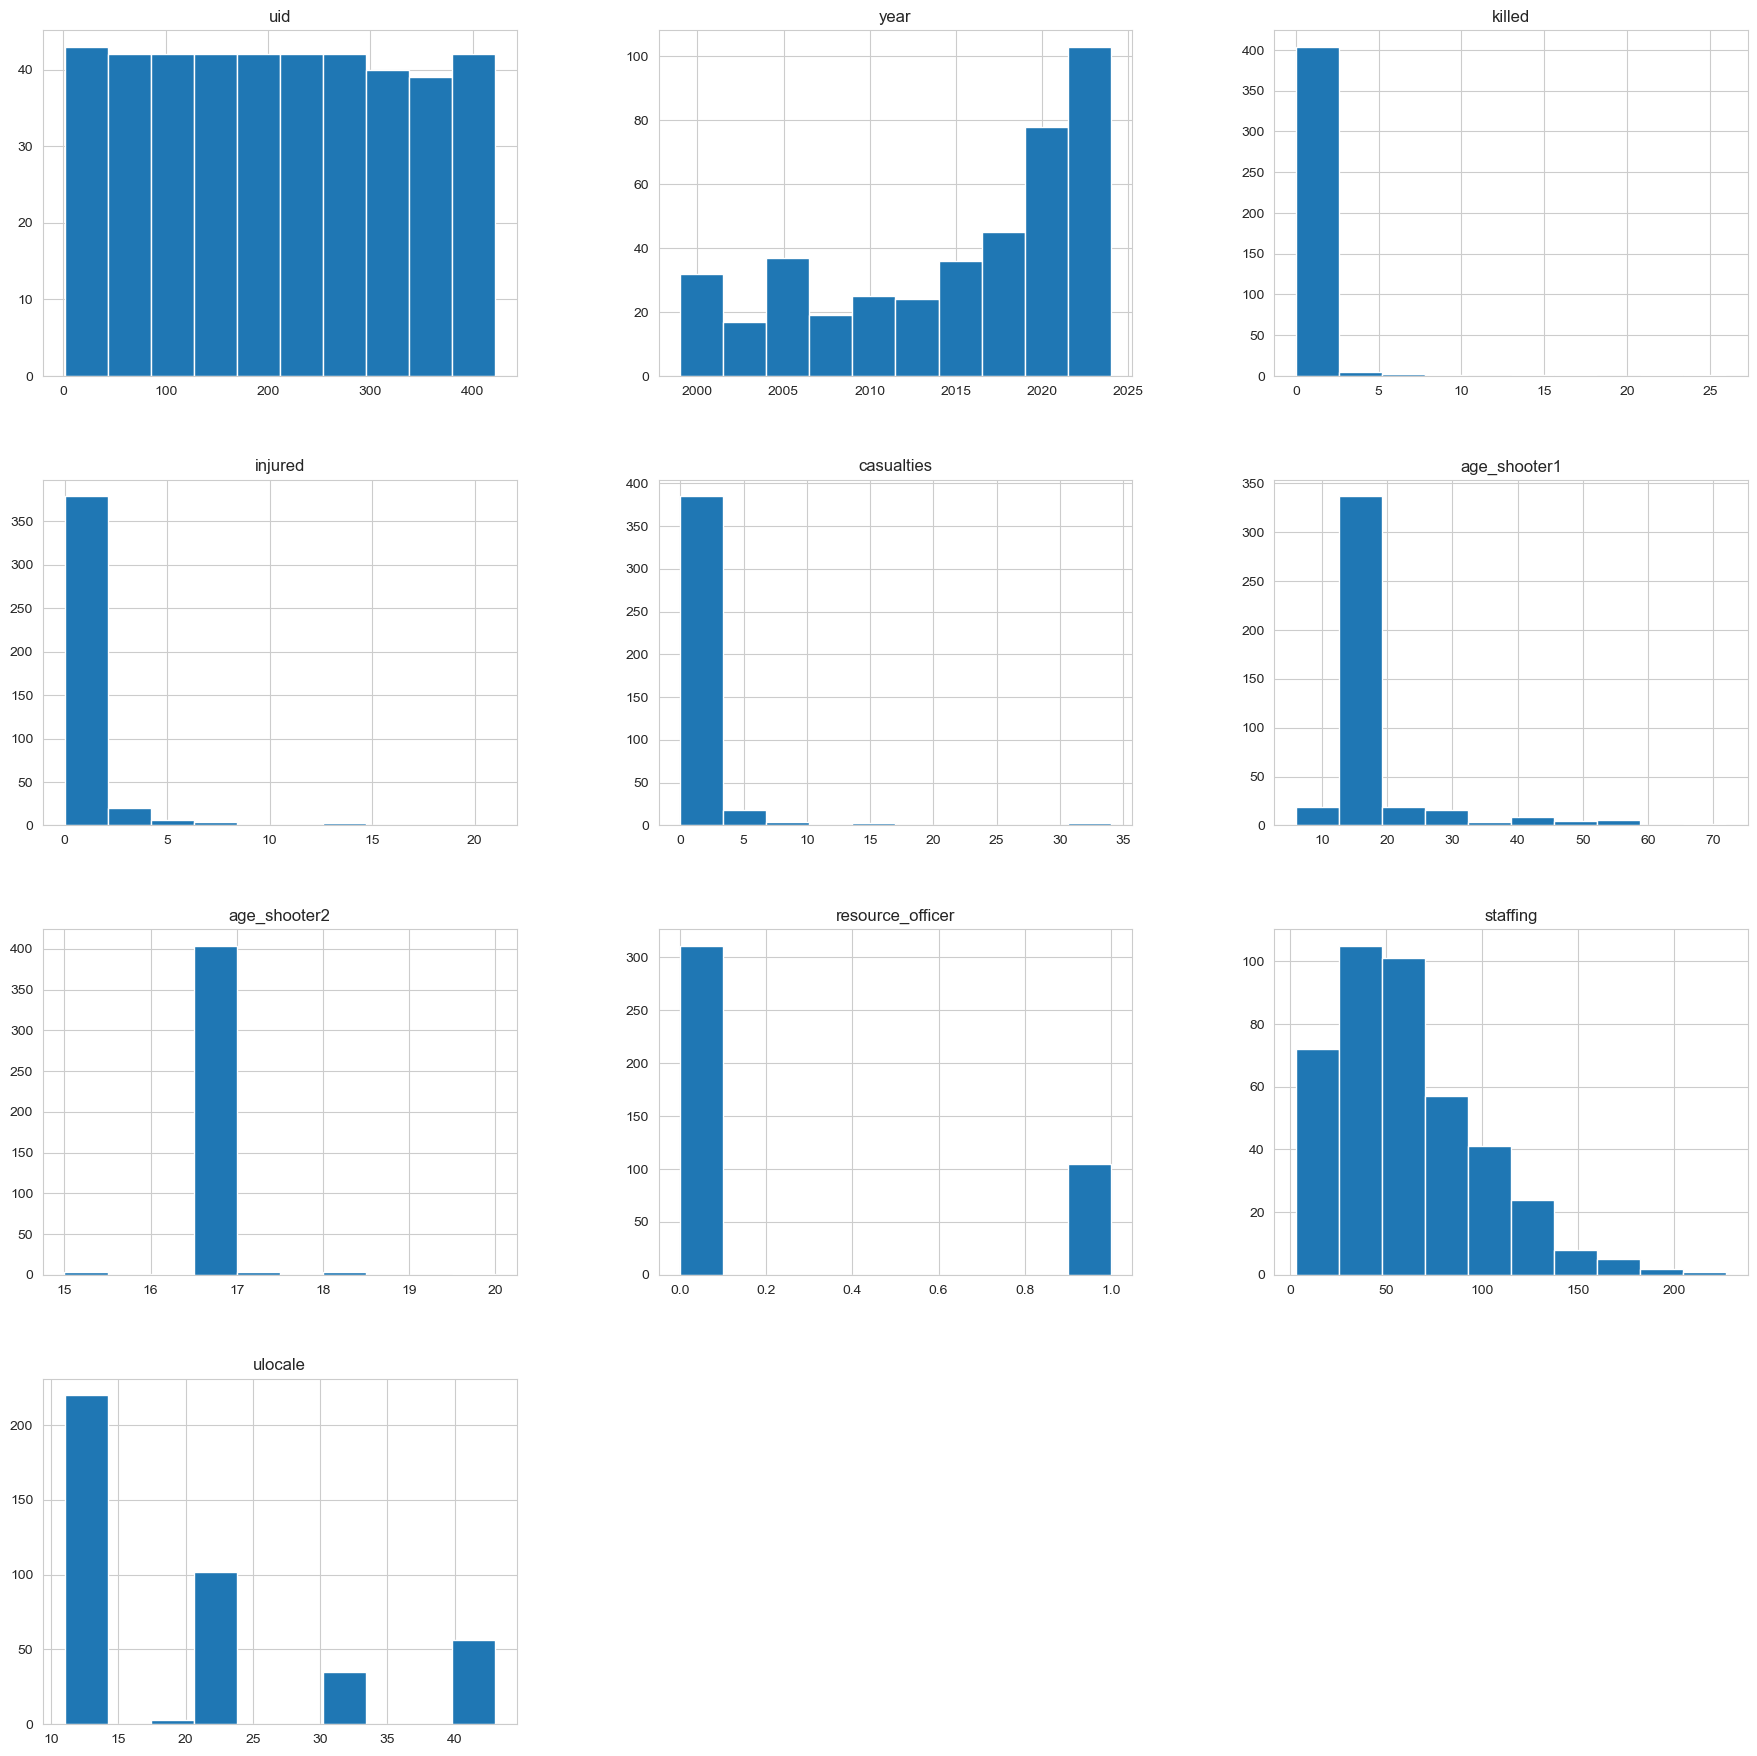

In [76]:
df.hist(figsize=(22, 22))

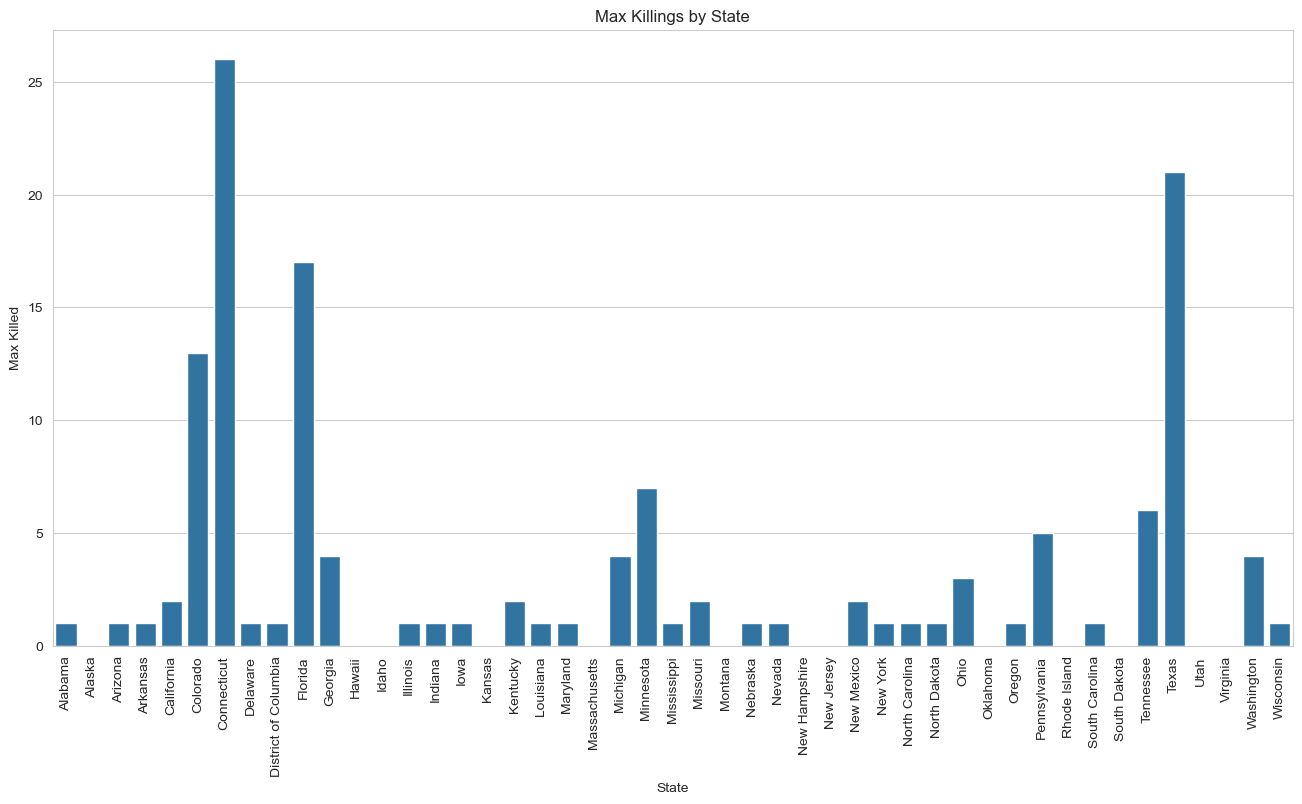

In [77]:
# Bar plot of killings by state
df_grouped = df.groupby('state')['killed'].max().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x='state', y='killed', data=df_grouped)
plt.title('Max Killings by State')
plt.xlabel('State')
plt.ylabel('Max Killed')
plt.xticks(rotation=90)
plt.show()

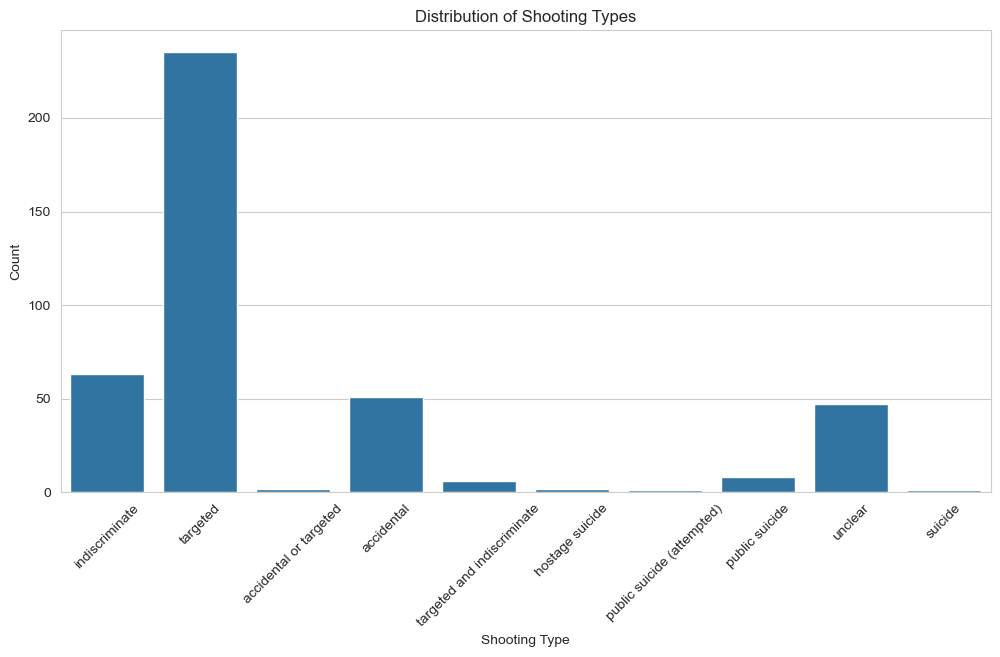

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(x='shooting_type', data=df)
plt.title('Distribution of Shooting Types')
plt.xlabel('Shooting Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

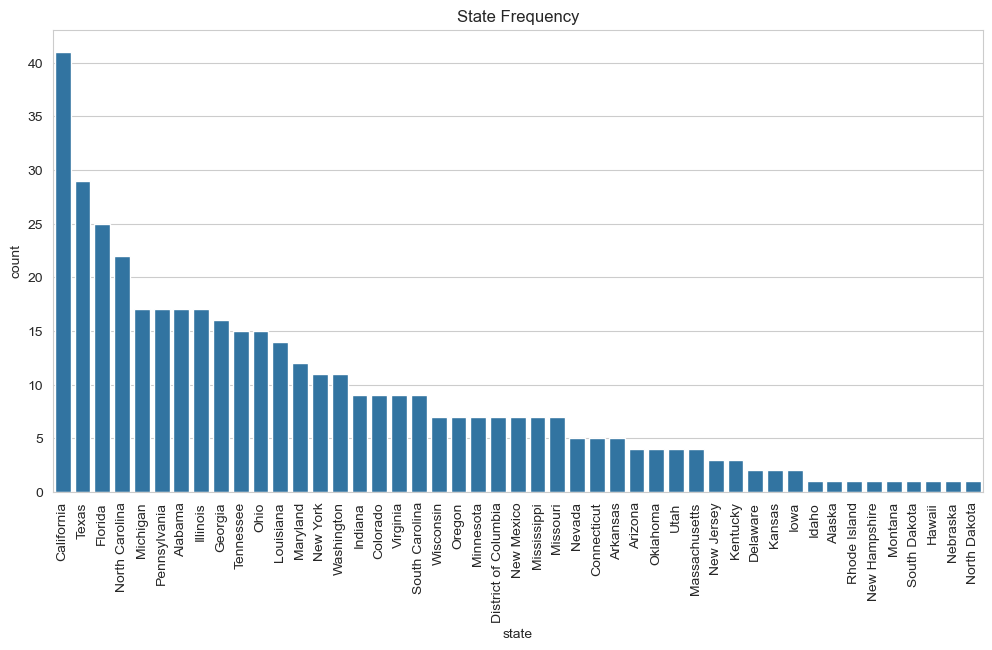

In [81]:
# Count plot for 'state'
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=df, order=df['state'].value_counts().index)
plt.title('State Frequency')
plt.xticks(rotation=90)
plt.show()

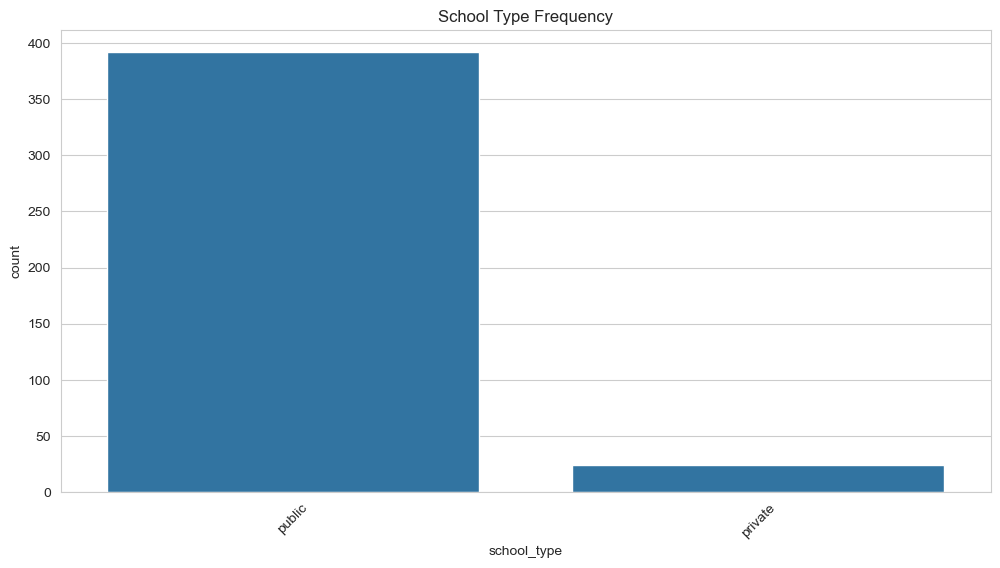

In [83]:
# Count plot for 'school_type'
plt.figure(figsize=(12, 6))
sns.countplot(x='school_type', data=df)
plt.title('School Type Frequency')
plt.xticks(rotation=45)
plt.show()

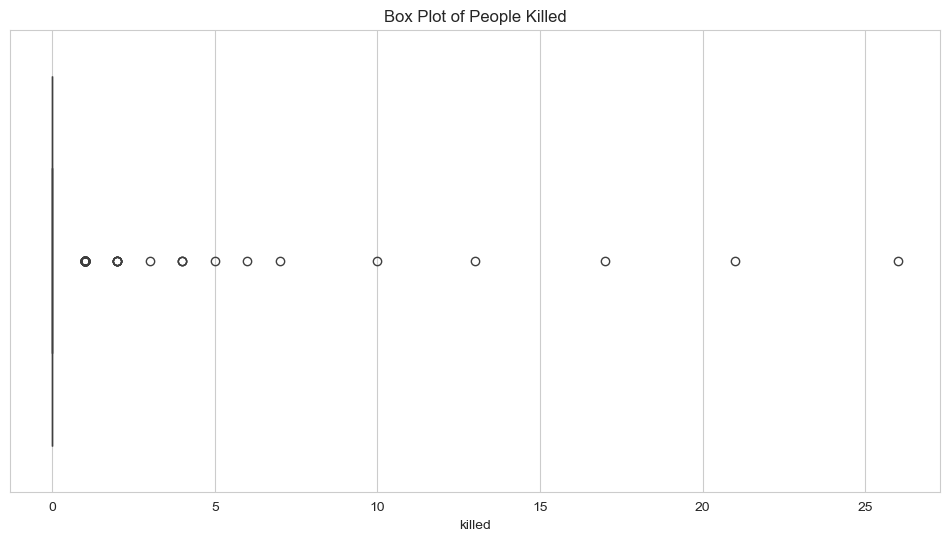

0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    1.0
Name: killed, dtype: float64


In [84]:
# Box plot for 'killed'
plt.figure(figsize=(12, 6))
sns.boxplot(x='killed', data=df)
plt.title('Box Plot of People Killed')
plt.show()
print(df.killed.quantile([0.05, 0.25, 0.50, 0.75, 0.95]))

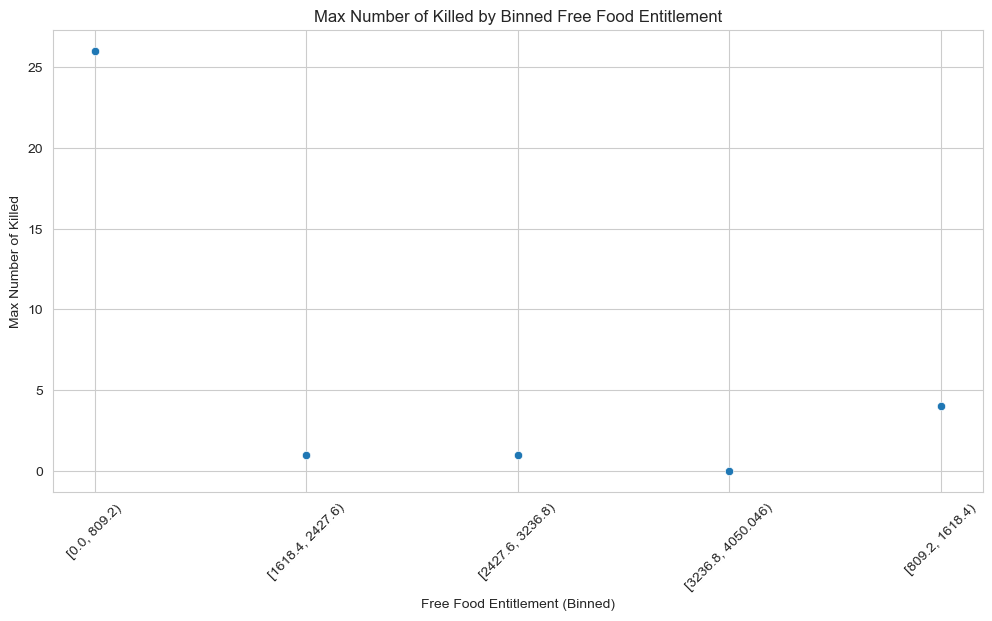

In [85]:
# Step 1: Check for non-numeric values in 'lunch'
#non_numeric_values = df[~df['lunch'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Step 2: Convert 'lunch' to numeric and handle errors (non-numeric values become NaN)
df['lunch'] = pd.to_numeric(df['lunch'], errors='coerce')

# Step 3: Handle NaN values (replace with 0, median, or drop them)
df['lunch'] = df['lunch'].fillna(0)  # You can also use df['lunch'].fillna(df['lunch'].median())

# Step 4: Bin the 'lunch' column starting from 0
df['lunch_binned'] = pd.cut(df['lunch'], bins=5, right=False, include_lowest=True)

# Step 5: Convert 'lunch_binned' to strings for plotting
df['lunch_binned_str'] = df['lunch_binned'].astype(str)

# Step 6: Recalculate max number of 'killed' for each bin
binned_data = df.groupby('lunch_binned_str')['killed'].max().reset_index()

# Step 7: Scatter plot between binned 'lunch_binned_str' and max 'killed'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lunch_binned_str', y='killed', data=binned_data)
plt.title('Max Number of Killed by Binned Free Food Entitlement')
plt.xlabel('Free Food Entitlement (Binned)')
plt.ylabel('Max Number of Killed')
plt.xticks(rotation=45)
plt.show()

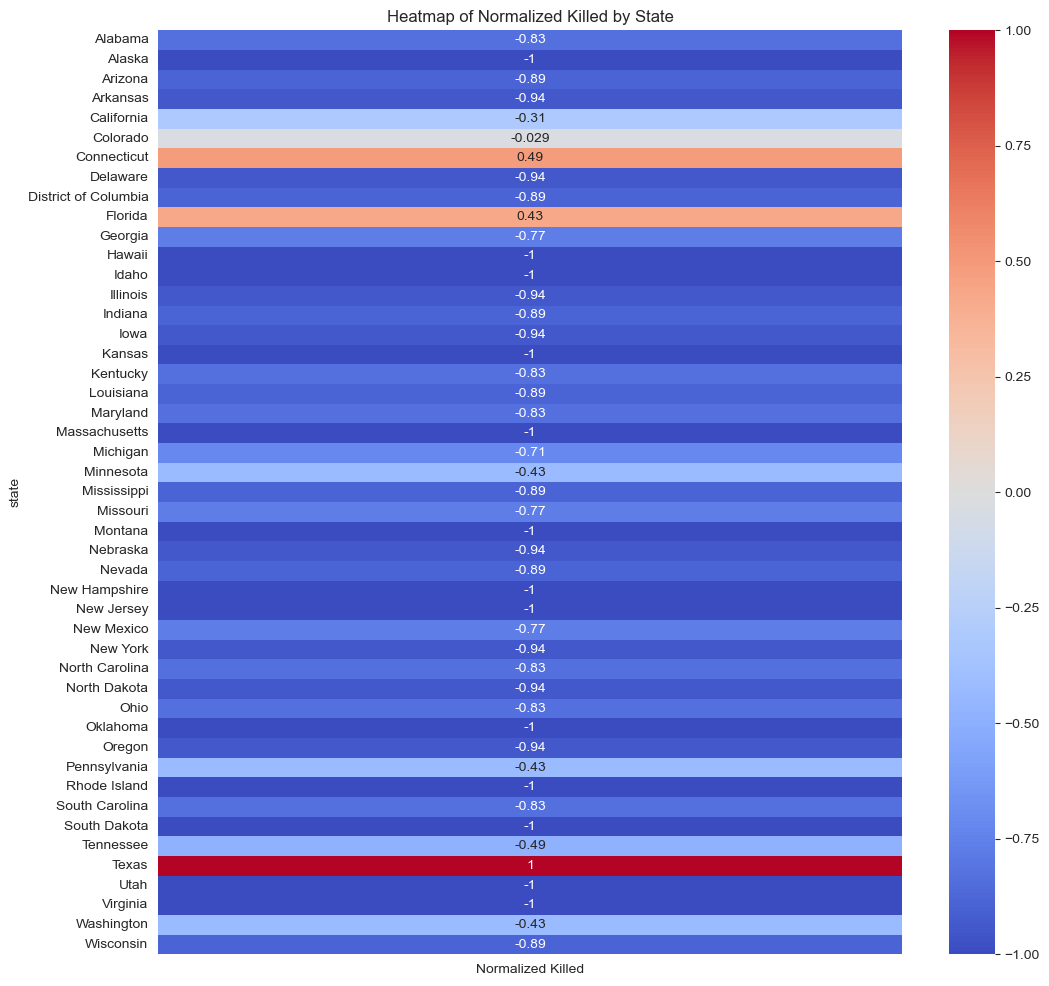

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Antag, at din DataFrame har en kolonne 'state' og en kolonne 'killed'
# Aggregere data per stat
aggregated_df = df.groupby('state')['killed'].sum().reset_index()

# Normalisere data til intervallet [0, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
aggregated_df['Normalized Killed'] = scaler.fit_transform(aggregated_df[['killed']])

# Opret en DataFrame til heatmap
heatmap_data = pd.DataFrame(aggregated_df['Normalized Killed'].values, index=aggregated_df['state'], columns=['Normalized Killed'])

# Tegn heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Normalized Killed by State')
plt.show()

# Data modellering

In [310]:
df.columns

Index(['uid', 'year', 'day_of_week', 'state', 'school_type', 'enrollment',
       'killed', 'injured', 'casualties', 'shooting_type', 'age_shooter1',
       'gender_shooter1', 'age_shooter2', 'gender_shooter2',
       'resource_officer', 'staffing', 'low_grade', 'high_grade', 'lunch',
       'ulocale', 'lunch_binned', 'lunch_binned_str'],
      dtype='object')

In [312]:
df_selected = df[['year', 'killed']]

In [314]:
print(f"Size of y_test: {len(y_test)}")
print(f"Size of predictions: {len(predictions)}")

Size of y_test: 167
Size of predictions: 84


In [316]:
df_selected.info

<bound method DataFrame.info of      year  killed
0    1999      13
1    1999       0
2    1999       0
3    1999       0
4    1999       0
..    ...     ...
411  2024       0
412  2024       1
413  2024       0
414  2024       1
415  2024       4

[416 rows x 2 columns]>

In [318]:
DV = 'killed' # Save our killed column as DV (Dependent variable)
X = df_selected.drop(DV, axis=1) # From our shuffled data we're going to remove our DV and axis = 1 (means our columns).
y = df_selected[DV] # This will only give us the 'killed' column.

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

In [344]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

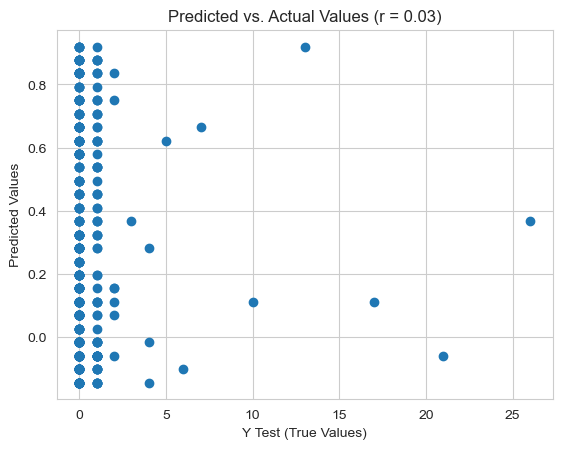

In [346]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()

In [90]:
df_dummies = pd.get_dummies(df)

In [92]:
df_shuffled = shuffle(df_dummies, random_state=42)

In [198]:
DV = 'killed' # Save our killed column as DV (Dependent variable)
X = df_shuffled.drop(DV, axis=1) # From our shuffled data we're going to remove our DV and axis = 1 (means our columns).
y = df_shuffled[DV] # This will only give us the 'killed' column.

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Linear 

In [104]:
model = LinearRegression()

In [105]:
model.fit(X_train, y_train)

LinearRegression()

In [106]:
print(model.intercept_)
print(model.coef_)

33.86032708111436
[ 1.97566535e-03 -1.76850333e-02 -1.29445586e+00  1.14821362e+00
 -1.19876378e-02  8.84599285e-02 -2.08997158e-02 -5.02534635e-05
 -3.06339058e-05  1.27172644e-02 -7.43267893e-02 -6.66176364e-02
 -3.74988602e-02  5.77386782e-03  1.72044703e-01 -4.53758792e-02
  1.38031373e-01 -1.94653091e-01 -1.43634323e-01 -2.67206230e-01
  3.37367875e-01  7.46822937e-02 -9.78486501e-02  4.36946953e-01
 -3.74432419e-01  9.88642294e-01  1.12595374e-01 -8.73035610e-06
 -8.88293750e-02 -6.82322221e-02 -7.42628144e-04  6.81500101e-02
  3.80922660e-01  2.03711336e-01 -1.74969200e-01 -3.89582589e-02
 -1.07630648e-01  2.90942345e-01 -1.82749592e-01  6.12720926e-02
  5.63121468e-02  9.07039899e-02  1.91528916e-02  5.21641825e-05
 -3.47474197e-02 -2.45770375e-01  9.53397108e-02 -3.14470781e-02
 -1.39498939e-05  1.76702183e-01  1.09156617e-02  2.02047993e-01
 -4.01911329e-02 -1.33270259e-05 -3.86949314e-01 -1.92934752e-01
 -5.67037457e-02 -1.96296865e-02 -4.64854699e-01 -1.74921163e-01
 -3.003

In [107]:
predictions = model.predict(X_test)

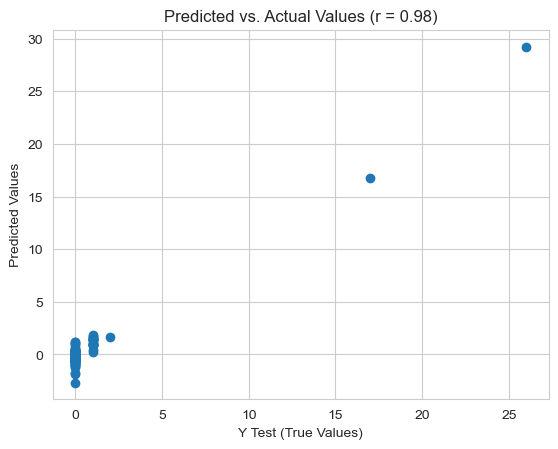

In [108]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()

In [109]:
metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)

In [110]:
metrics_df

,Metric,Value
0,MAE,0.406
1,MSE,0.374
2,RMSE,0.612
3,R-Squared,0.948


# Multiple 

In [113]:
# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

In [116]:
df_dummies.columns

Index(['uid', 'year', 'killed', 'injured', 'casualties', 'age_shooter1',
       'age_shooter2', 'resource_officer', 'staffing', 'lunch',
       ...
       'lunch_binned_[0.0, 809.2)', 'lunch_binned_[809.2, 1618.4)',
       'lunch_binned_[1618.4, 2427.6)', 'lunch_binned_[2427.6, 3236.8)',
       'lunch_binned_[3236.8, 4050.046)', 'lunch_binned_str_[0.0, 809.2)',
       'lunch_binned_str_[1618.4, 2427.6)',
       'lunch_binned_str_[2427.6, 3236.8)',
       'lunch_binned_str_[3236.8, 4050.046)',
       'lunch_binned_str_[809.2, 1618.4)'],
      dtype='object', length=487)

In [118]:
# create a Python list of feature names
feature_cols = ['lunch', 'staffing', 'resource_officer']

# use the list to select a subset of the original DataFrame
X = df_dummies[feature_cols]

# print the first 5 rows
X.head()

list(zip(feature_cols, linreg.coef_))

[('lunch', 0.0019756653512560244),
 ('staffing', -0.01768503331242152),
 ('resource_officer', -1.2944558565487538)]

In [120]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)

In [122]:
y_predicted

array([-4.42229486e-01,  1.64773816e+00, -1.86740022e+00,  5.78246331e-02,
       -1.78758430e+00,  5.15850161e-01, -2.67754629e+00,  9.62468235e-02,
        1.82350880e+00,  9.23767734e-01,  1.17611626e-01, -8.80493488e-01,
       -6.80794222e-01, -1.07895320e-01, -3.66334739e-01, -1.57961804e-01,
       -2.78248465e-02, -9.06380031e-02,  1.21901935e-01,  4.13846911e-02,
       -2.89841982e-01, -2.34095682e-01, -3.83265308e-02, -3.74759615e-01,
        1.60108289e+00,  1.90175973e-01, -6.00027388e-01,  1.41569236e+00,
        1.74089413e-01, -1.19682218e-01,  1.18764026e+00, -3.93771129e-01,
        2.92555346e+01,  9.88965211e-01, -9.78041494e-01, -5.41069730e-02,
       -3.12551272e-01,  4.04104787e-01,  1.67985689e+01, -1.33525104e-01,
       -1.00976745e-01, -7.65690408e-01,  1.29129682e-01,  2.41295534e-01,
        1.12716087e+00, -2.23908886e-01,  8.86051043e-01, -1.32322213e-01,
        4.00664551e-01, -5.08953311e-01, -2.59835191e-01, -6.38249778e-01,
        3.89557638e-01, -

In [124]:
import sklearn.metrics as sm

# Explained variance (1 would be the best prediction)
eV = round(sm.explained_variance_score(y_test, y_predicted), 6)
print('Explained variance score ',eV )

Explained variance score  0.94766


In [126]:
# R-squared
r2_score(y_test, y_predicted)

0.9461395191516491

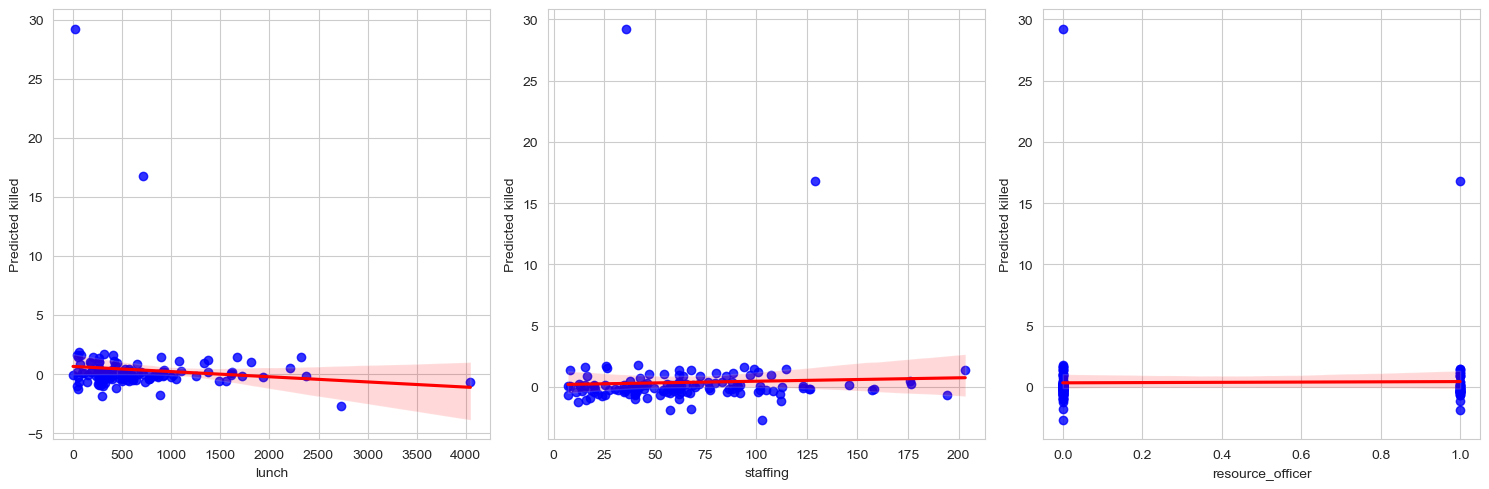

In [128]:
features = ['lunch', 'staffing', 'resource_officer']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    sns.regplot(x=X_test[feature], y=y_predicted, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.xlabel(feature)
    plt.ylabel('Predicted killed')
plt.tight_layout()
plt.show()

# Polynomial

In [130]:
df.columns

Index(['uid', 'year', 'day_of_week', 'state', 'school_type', 'enrollment',
       'killed', 'injured', 'casualties', 'shooting_type', 'age_shooter1',
       'gender_shooter1', 'age_shooter2', 'gender_shooter2',
       'resource_officer', 'staffing', 'low_grade', 'high_grade', 'lunch',
       'ulocale', 'lunch_binned', 'lunch_binned_str'],
      dtype='object')

In [170]:

# Group by the features you're interested in and count the number of shootings
data_grouped = df.groupby(['state', 'school_type', 'year']).size().reset_index(name='num_shootings')

# Define X and y
X = data_grouped[['state', 'school_type', 'year']]  # Independent variables
y = data_grouped['num_shootings']  # Dependent variable, number of shootings

# One-hot encode categorical variables like 'state' and 'school_type'
X = pd.get_dummies(X, columns=['state', 'school_type'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Coefficients of the linear regression
print(list(zip(X.columns, linreg.coef_)))


[('year', 0.025172230147285396), ('state_Alaska', -0.37123317397353994), ('state_Arizona', -0.47229206532909157), ('state_Arkansas', -0.3208158797761186), ('state_California', 1.031215911395522), ('state_Colorado', -0.24547514338608958), ('state_Connecticut', -0.21828273884221), ('state_Delaware', -0.4967956829096316), ('state_District of Columbia', -0.026618377391075445), ('state_Florida', 0.20185706155648453), ('state_Georgia', 0.254215562376531), ('state_Hawaii', -21393921124.98537), ('state_Idaho', 2001404131355.9055), ('state_Illinois', 0.49145197334409474), ('state_Indiana', 6.478424523122816e-06), ('state_Iowa', -0.5226320430215506), ('state_Kansas', -0.4718253741194648), ('state_Kentucky', -0.19525671625346652), ('state_Louisiana', 0.10415758650246423), ('state_Maryland', 0.2973505305265572), ('state_Massachusetts', -0.2846668517430674), ('state_Michigan', -0.0705051484165286), ('state_Minnesota', -0.18670905234305427), ('state_Mississippi', -0.12966625304655627), ('state_Misso

In [172]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)

In [174]:
y_predicted

array([ 1.05597973e+00,  1.30960225e+00,  9.50134812e-01,  1.24174755e+00,
        1.54243045e+00,  1.93179402e+00,  1.92044841e+00,  1.12017072e+00,
        2.20125187e+00,  1.45039916e+00,  9.24760661e-01,  1.02247125e+00,
        4.46021597e-01,  1.16786138e+00,  9.49470682e-01,  1.14268915e+00,
        1.49273244e+00,  1.26600865e+00,  1.87010395e+00,  1.59844310e+00,
        1.44693697e+00,  8.48777279e-01,  8.47808514e-01,  1.15128685e+00,
        9.22778529e-01,  9.48306330e-01,  1.61859360e+00,  1.38914853e+00,
        7.88647409e-01,  1.17614383e+00,  1.76270240e+00,  8.86520153e-01,
        1.72631829e+00,  1.64310908e+00, -3.21476171e+05, -3.84800667e+05,
        9.46794928e-01,  1.32608089e+00, -2.13939211e+10,  1.19303361e+00,
        1.37141380e+00,  1.86397173e+00,  1.29588877e+00,  1.79415275e+00,
        1.28539367e+00,  1.07577016e+00,  1.47258195e+00,  9.98295219e-01,
        1.49582881e+00,  1.40976564e+00,  1.36479253e+00,  7.27038228e-01,
        6.44407399e-01,  

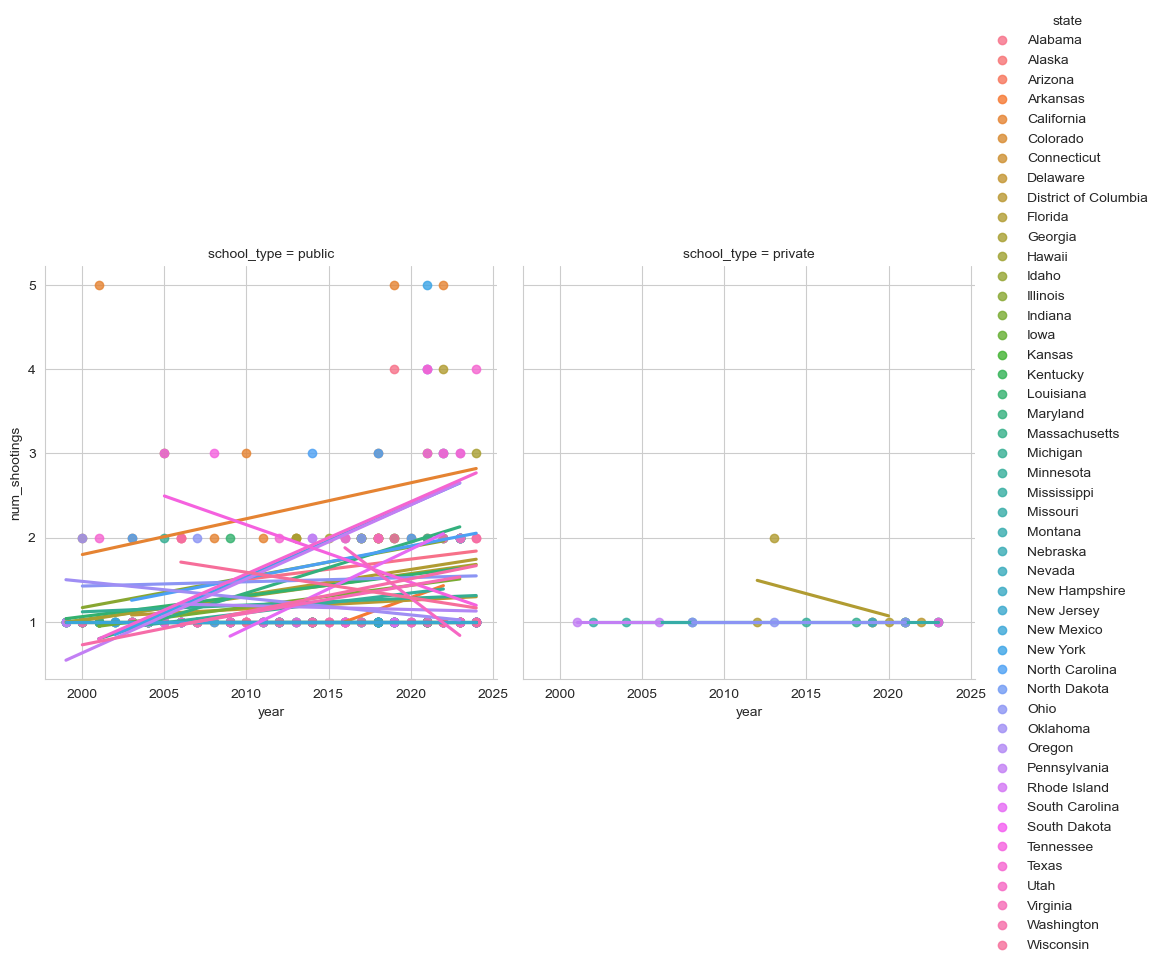

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simplified lmplot to show relationships between year, num_shootings, with state and school_type
sns.lmplot(x='year', y='num_shootings', hue='state', col='school_type', data=data_grouped, ci=None)

# Show plot
plt.show()


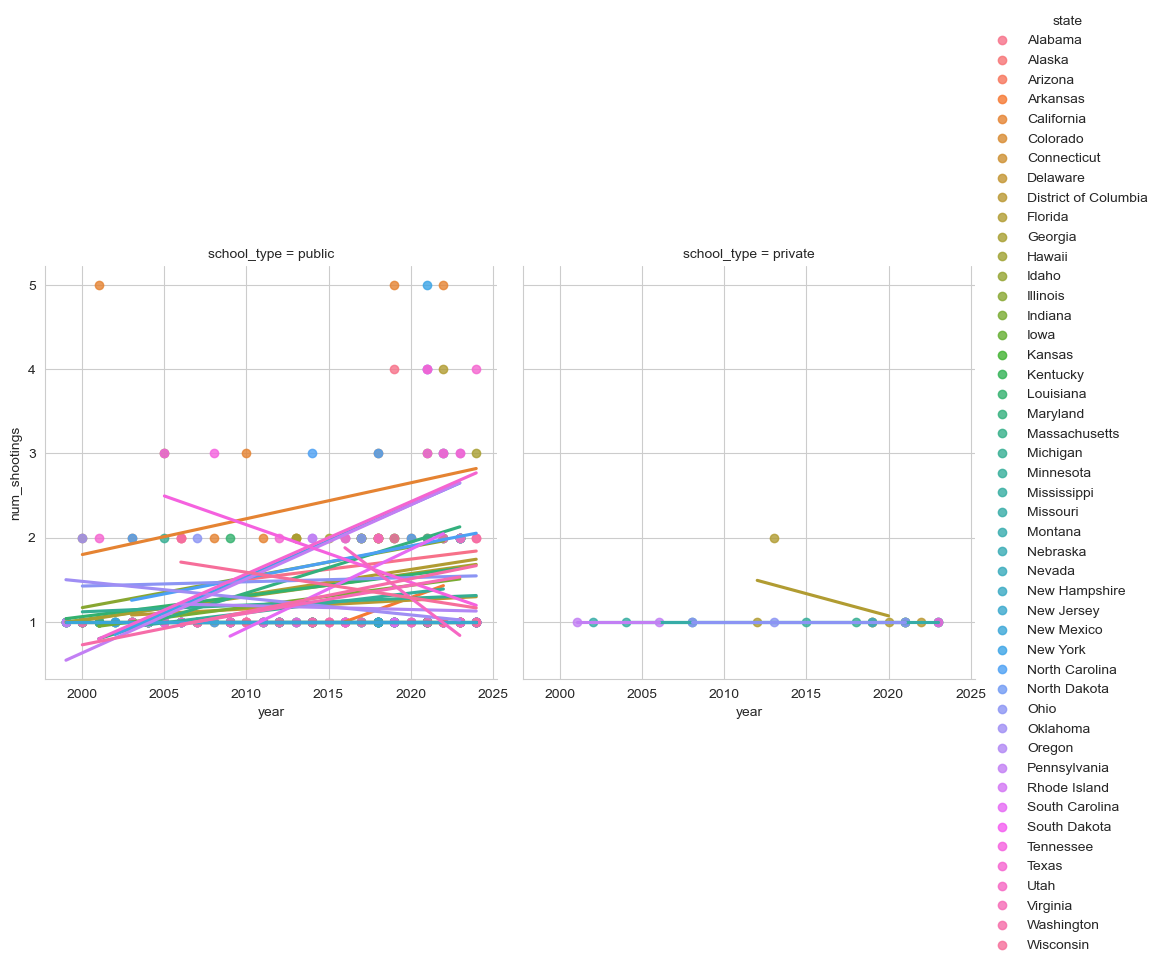

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simplified lmplot to show relationships between year, num_shootings, with state and school_type
sns.lmplot(x='year', y='num_shootings', hue='state', col='school_type', data=data_grouped, ci=None)

# Show plot
plt.show()